In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from supermarket_categories import SupermarketCategories

df = pd.read_csv('datamarket_productos_de_supermercados.csv')
sc = SupermarketCategories(df, 
                           load_split_categories=False, 
                           simplify_data=True,
                           price_diff=True)
display(sc.dataset)

,insert_date,product_id,supermarket,name,price,reference_price,reference_unit,main_category,secondary_category,type,supercategories,price_diff,full_series
0,2021-03,000524d73b9d09ae193aaf463191b038,carrefour-es,Pechuga de pavo Braseado Campofrío Finissimas ...,2.60,15.29,kg,charcuteria,fiambre_de_pavo_y_pollo,fiambre_de_pavo_y_pollo,carne,NaN,False
1,2021-03,000780b12d67871681dccc1383869831,carrefour-es,Caramelos de goma Favoritos Haribo 275 g.,2.75,10.00,kg,la_despensa,dulce_y_desayuno,dulces_y_golosinas,conservas,NaN,False
2,2021-03,000980fa0323353bf82a87c4edbece89,dia-es,MERCADER granizado de limón pack 4 x 200 ml,1.55,2.04,kg,congelados_y_helados,helados,zumos_horchatas_y_granizados,congelados,NaN,False
3,2021-03,000d481c0e60b87db07bd8e395e505de,dia-es,DIA cocido madrileño lata 440 gr,1.39,3.16,kg,alimentacion,legumbres,legumbres_preparadas,alimentacion_otros,NaN,True
4,2021-03,0010432366ece6221db98d6f1dc15d0b,mercadona-es,Vasos grandes de plástico Bosque Verde reutili...,1.50,0.15,ud,limpieza_y_hogar,menaje_y_conservacion_de_alimentos,menaje_y_conservacion_de_alimentos,drogueria,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299630,2022-06,ffdf78a9448041173eb593f95d0af392,carrefour-es,Picos camperos con aceite de oliva virgen extr...,0.76,3.04,kg,productos_frescos,panaderia_bolleria_y_pasteleria,pan_de_molde_tostado_y_picos,frescos,0.320,False
299631,2022-06,fff2489d5b4ff800027ee527b8e6dea3,dia-es,FLORBU galletas de chocolate 0% azucares añadi...,1.59,8.59,kg,despensa,desayunos_y_dulces,galletas,conservas,NaN,False
299632,2022-06,fff3bcc496c06619a23befd1cd9003c9,dia-es,DIA PLANETA BEBE protector de cama bebé paquet...,4.95,0.33,ud,bebe,cuidado_del_bebe_,,bebe,0.000,False
299633,2022-06,fff473551393a45da35c7ea160c52ada,mercadona-es,Bebida láctea de fresa y plátano Hacendado,1.30,1.30,kg,postres_y_yogures,yogures,liquidos,lacteos_y_huevos,0.140,True


In [2]:
sc.dataset.to_csv('datamarket.csv', index=False)

,product_id
supermarket,
carrefour-es,14257
dia-es,10040
mercadona-es,8452


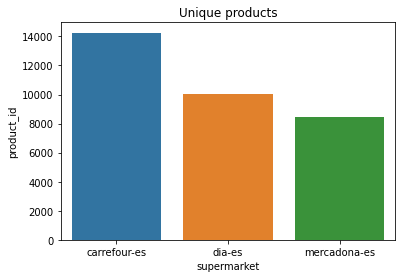

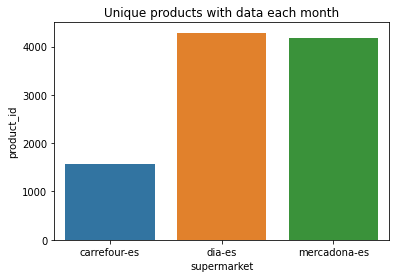

In [24]:
df = sc.dataset[['supermarket', 'product_id']].groupby(['supermarket']).nunique()
display(df)
sns.barplot(x=df.index, y="product_id", data=df).set(title='Unique products')
plt.show()

df = sc.dataset.loc[sc.dataset.full_series, ['supermarket', 'product_id']].groupby(['supermarket']).nunique()
sns.barplot(x=df.index, y="product_id", data=df).set(title='Unique products with data each month')
plt.show()

In [ ]:
Sngular-Data y poner en seguimiento a alguien de coordinación

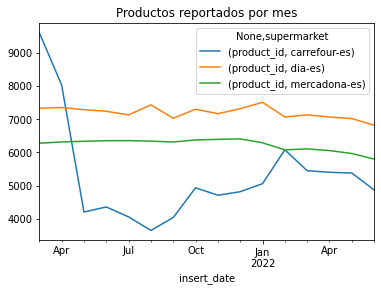

In [7]:
x = sc.dataset[['insert_date', 'supermarket','product_id']].groupby(['insert_date', 'supermarket']).nunique()

x.unstack().plot()
plt.title('Productos reportados por mes')
plt.show()

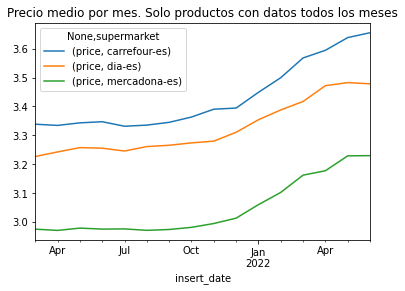

In [14]:
x = sc.dataset.loc[sc.dataset.full_series, ['insert_date', 'supermarket', 'price']].groupby(['insert_date', 'supermarket']).mean('price')

x.unstack().plot()
plt.title('Precio medio por mes. Solo productos con datos todos los meses')
plt.show()

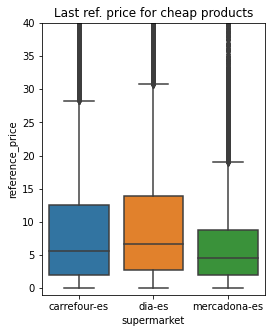

In [22]:
df_last = sc.dataset.groupby(['product_id', 'supermarket', 'main_category', 'secondary_category', 'type']).last('insert_date').reset_index()

plt.figure(figsize=(4, 5))
sns.boxplot(x="supermarket", y="reference_price", data=df_last).set(title='Last ref. price for cheap products')
plt.ylim(-1, 40)
plt.show()

In [15]:
for supermarket in ['carrefour-es', 'dia-es', 'mercadona-es']:
    f_supermarket = sc.dataset.supermarket==supermarket
    print(supermarket)
    display(sc.dataset.loc[
        f_supermarket,
        ['insert_date', 'name', 'price', 'reference_price', 'reference_unit']
    ].sort_values(['price', 'insert_date'], ascending=[False, False]).groupby('name').first().sort_values('price', ascending=False).head(5))

carrefour-es


,insert_date,price,reference_price,reference_unit
name,,,,
Barbacoa de Pellets - 130x55x120 Cm / 54 kg,2022-02,595.0,595.00,ud
Barbacoa Vertical con Chimena y Ladrillos Refractarios,2022-02,459.0,459.00,ud
Jamón de bellota ibérico 100% raza ibérica pieza 7 kg aprox,2022-06,409.0,62.92,kg
Jamón ibérico bellota 100% raza ibérica 10 Vetas pieza 6 kg aprox,2022-04,339.0,56.50,kg
"Paleta de bellota ibérica 100% raza ibérica pieza de 4,7 kg aprox",2022-06,219.0,46.11,kg


dia-es


,insert_date,price,reference_price,reference_unit
name,,,,
NOBLEZA EXTREMEÑA jamón de bellota 100% Ibérico (peso aprox. 7.5 Kg),2022-02,289.0,38.53,kg
NOBLEZA EXTREMEÑA jamón de bellota 100% ibérico (peso aprox. 7.5 Kg),2022-06,289.0,38.53,kg
LEGADO jamón de cebo Ibérico 50% raza ibérica pieza (peso aprox. 7.5 Kg),2022-05,135.0,18.00,kg
SÁNCHEZ ALCARAZ jamón de cebo Ibérico 50% pieza (peso aprox. 8 Kg),2022-06,125.0,15.63,kg
CANPIPORK jamón de cebo Ibérico 50% raza ibérica pieza (peso aprox. 7.5 Kg),2022-06,115.0,15.33,kg


mercadona-es


,insert_date,price,reference_price,reference_unit
name,,,,
Jamón de bellota ibérico 100% Campo Extremadura,2022-06,479.75,50.500,kg
Jamón de bellota ibérico 50% La Hacienda del ibérico,2022-06,369.00,41.000,kg
Jamón de bellota ibérico La Hacienda del ibérico,2022-04,351.00,39.000,kg
Jamón de bellota ibérico 100% Covap,2021-12,290.00,38.667,kg
Jamón de bellota ibérico 50% raza ibérica Juan del Roble,2022-03,210.00,28.000,kg


In [16]:
for supermarket in ['carrefour-es', 'dia-es', 'mercadona-es']:
    f_supermarket = sc.dataset.supermarket==supermarket
    print(supermarket)
    display(sc.dataset.loc[
        f_supermarket,
        ['insert_date', 'name', 'price', 'reference_price', 'reference_unit']
    ].sort_values(['price', 'insert_date'], ascending=[False, False]).groupby('name').first().sort_values('price', ascending=True).head(5))

carrefour-es


,insert_date,price,reference_price,reference_unit
name,,,,
Agua mineral Primavera natural 50 cl.,2021-04,0.15,0.30,l
Agua mineral Fuente Primavera 50 cl.,2022-06,0.16,0.32,l
Agua mineral Carrefour Kids natural 33 cl.,2021-04,0.19,0.58,l
"Agua mineral Fuente Primavera natural 1,5 l.",2021-09,0.20,0.13,l
Agua mineral con gas Carrefour 50 cl.,2022-06,0.21,0.42,l


dia-es


,insert_date,price,reference_price,reference_unit
name,,,,
DIA DULCE NOEL hojaldrada clásica surtido 25 gr,2021-11,0.10,3.95,kg
DIA DULCE NOEL rosco de vino surtido 32 gr,2021-12,0.13,3.95,kg
DIA DULCE NOEL almendra rellena surtido 10 gr,2021-11,0.13,12.90,kg
DIA DULCE NOEL polvorones sin azúcar a granel unidad (35 gr peso aprox.),2021-12,0.14,3.95,kg
DIA DULCE NOEL mantecado aceite de oliva/sésamo surtido 42 gr,2021-12,0.17,3.95,kg


mercadona-es


,insert_date,price,reference_price,reference_unit
name,,,,
Bolitas de coco Antiu Xixona,2022-01,0.08,4.000,kg
Alfajor de almendra La Muralla,2022-01,0.11,4.000,kg
Panecillo,2022-06,0.11,0.245,100g
Rosco de vino y almendra La Muralla,2022-01,0.12,4.000,kg
Hojaldrada La Muralla,2022-01,0.12,4.000,kg
